In [8]:
import numpy as np

# customers
class Customer:
    
    def __init__(self, number, arrival_time, queue_time = 0, service_time = 6):
        self.number = number
        self.arrival_time = arrival_time
        self.queue_time = queue_time
        self.service_time = int(np.random.poisson(service_time, 1))


In [9]:
def simulate(queue_times, service_times, system_times):
    t=0
    queue = []
    tot_arr = 0
    show_up= True
    customer_number = 1
    served_customers = []
    
    # initialize 3 cashiers
    cashier1_available = True
    cashier1_time_remaining = 0
    cashier2_available = True
    cashier2_time_remaining = 0
    cashier3_available = True
    cashier3_time_remaining = 0

    while t < 720: # while store is open (minutes/day)

        if show_up == True: # create inter arrival times
            at = int(np.random.poisson(3, 1)) + 1
            tot_arr += at
            show_up = False


        if t == tot_arr: # make new customers join the queue
            queue.append(Customer(customer_number, at))
            show_up = True
            customer_number += 1

        if cashier1_available and queue: #make queued customer join cashier 1
            served_customers.append(queue.pop(0))
            cashier1_available = False
            cashier1_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        cashier1_time_remaining -= 1

        if cashier1_time_remaining == 0: #open cashier 1 when customer leaves
            cashier1_available = True

        if cashier2_available and queue: #make queued customer join cashier 2
            served_customers.append(queue.pop(0))
            cashier2_available = False
            cashier2_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        cashier2_time_remaining -= 1

        if cashier2_time_remaining == 0: #open cashier 2 when customer leaves
            cashier2_available = True
        ###    
        if cashier3_available and queue: #make queued customer join cashier 3
            served_customers.append(queue.pop(0))
            cashier3_available = False
            cashier3_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        cashier3_time_remaining -= 1

        if cashier3_time_remaining == 0: #open cashier 3 when customer leaves
            cashier3_available = True
        ###    
        t += 1

        if queue: # add 1 minute waiting time to each customer per loop iteration
            for customer in queue:
                customer.queue_time += 1

    for customer in served_customers: # append all data to analyze later
        queue_times.append(customer.queue_time)
        service_times.append(customer.service_time)
        system_times.append(customer.queue_time + customer.service_time)
           

In [10]:
queue_times = []
service_times = []
system_times = []

for i in range(1000):
    simulate(queue_times, service_times, system_times)

(0, 180000)

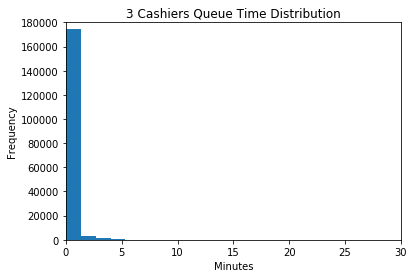

In [54]:
import matplotlib.pyplot as plt

plt.hist(queue_times, bins = 6)

# Add title and axis names
plt.title('3 Cashiers Queue Time Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Limits for the X axis
plt.xlim(0,30)
plt.ylim(0,180000)

(array([5.09135783e-03, 0.00000000e+00, 3.19872718e-02, 0.00000000e+00,
        9.74735014e-02, 0.00000000e+00, 1.94342328e-01, 0.00000000e+00,
        2.89409226e-01, 0.00000000e+00, 3.51170662e-01, 0.00000000e+00,
        0.00000000e+00, 3.52089767e-01, 0.00000000e+00, 2.96387168e-01,
        0.00000000e+00, 2.24975130e-01, 0.00000000e+00, 1.50116448e-01,
        0.00000000e+00, 8.90080608e-02, 0.00000000e+00, 4.83860396e-02,
        0.00000000e+00, 0.00000000e+00, 2.48279278e-02, 0.00000000e+00,
        1.08720444e-02, 0.00000000e+00, 4.71645974e-03, 0.00000000e+00,
        1.97123830e-03, 0.00000000e+00, 7.61889651e-04, 0.00000000e+00,
        2.17682757e-04, 0.00000000e+00, 0.00000000e+00, 7.25609191e-05,
        0.00000000e+00, 1.20934865e-05, 0.00000000e+00, 1.20934865e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.20934865e-05]),
 array([ 0.  ,  0.46,  0.92,  1.38,  1.84,  2.3 ,  2.76,  3.22,  3.68,
         4.14,  4.6 ,  

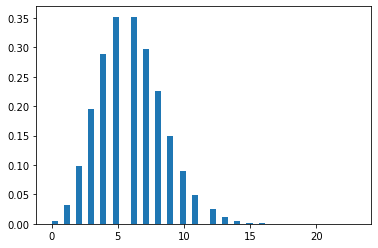

In [13]:
plt.hist(service_times, bins = 50, density=True)

(0, 30000)

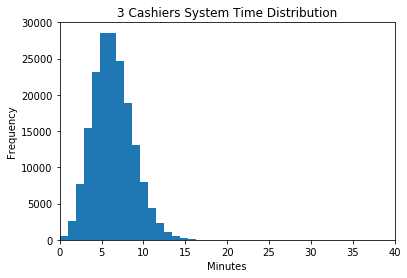

In [55]:
plt.hist(system_times, bins = 23)

# Add title and axis names
plt.title('3 Cashiers System Time Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Limits for the X axis
plt.xlim(0,40)
plt.ylim(0, 30000)

In [15]:
over_time_limit = []
for i in system_times:
    if i > 10:
        over_time_limit.append(i)

len(over_time_limit)/len(system_times)

0.04884317335988741